<a href="https://colab.research.google.com/github/avneeshdubey99/ML_Lab1/blob/master/ML_Exp_07(24_08_2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 7

## Classification using Neural Networks

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Dataset : !wget -O Titanic.csv "https://raw.githubusercontent.com/pranavn91/blockchain/master/train.csv"

In [ ]:
!wget -O Titanic.csv "https://raw.githubusercontent.com/pranavn91/blockchain/master/train.csv"

--2020-09-04 05:30:08--  https://raw.githubusercontent.com/pranavn91/blockchain/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘Titanic.csv’

Titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.008s  

2020-09-04 05:30:08 (7.39 MB/s) - ‘Titanic.csv’ saved [61194/61194]



### Preprocessing

In [ ]:
titanic=pd.read_csv("Titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic['Age'].fillna(titanic['Age'].median(), inplace = True)

titanic.drop(['Cabin','PassengerId', 'Name','Ticket'], axis = 1, inplace = True)

In [ ]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic['Embarked'].fillna('S',inplace=True)

In [ ]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df_num = titanic.select_dtypes(include=[np.number]).copy()
df_num

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,28.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [ ]:
df_cat = titanic.select_dtypes(include='object').copy()
df_cat

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [ ]:
df_cat = pd.get_dummies(df_cat)
df_cat

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [ ]:
titanic = pd.concat([df_num,df_cat],axis=1)
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [ ]:
titanic.drop(columns=['Sex_male','Embarked_C'],inplace=True)
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,1
3,1,1,35.0,1,0,53.1000,1,0,1
4,0,3,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,1
888,0,3,28.0,1,2,23.4500,1,0,1
889,1,1,26.0,0,0,30.0000,0,0,0


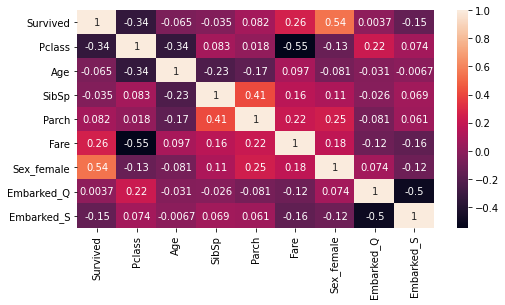

In [ ]:
cormat = titanic.corr()
fig, ax = plt.subplots(figsize = [8,4])
sns.heatmap(data = cormat, annot=True)
plt.show()

### Building NN model

In [ ]:
X = titanic.drop(columns=['Survived'])
Y = titanic['Survived']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05)
print("x_train_shape"+str(x_train.shape))
print("y_train_shape"+str(y_train.shape))
print("x_test_shape"+str(x_test.shape))
print("y_test_shape"+str(y_test.shape))

x_train_shape(846, 8)
y_train_shape(846,)
x_test_shape(45, 8)
y_test_shape(45,)


In [ ]:
nn = models.Sequential()
nn.add(layers.Dense(512, activation="tanh",input_shape=(8, )))
nn.add(layers.Dense(256, activation="sigmoid"))
nn.add(layers.Dense(64, activation="tanh"))
nn.add(layers.Dense(32, activation="relu"))
nn.add(layers.Dense(16, activation="tanh"))
nn.add(layers.Dense(1, activation="sigmoid"))

nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               4608      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 155,009
Trainable params: 155,009
Non-trainable params: 0
________________________________________________

In [ ]:
nn.compile(optimizer="rmsprop",
           loss='binary_crossentropy',
           metrics = ['accuracy'])

In [ ]:
#hyperpara
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=300)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history = nn.fit(x_train,y_train, epochs=5000, validation_split=0.05, verbose=0, callbacks=[es, mc])


Epoch 00001: val_accuracy did not improve from 0.90698

Epoch 00002: val_accuracy did not improve from 0.90698

Epoch 00003: val_accuracy did not improve from 0.90698

Epoch 00004: val_accuracy did not improve from 0.90698

Epoch 00005: val_accuracy did not improve from 0.90698

Epoch 00006: val_accuracy did not improve from 0.90698

Epoch 00007: val_accuracy did not improve from 0.90698

Epoch 00008: val_accuracy did not improve from 0.90698

Epoch 00009: val_accuracy did not improve from 0.90698

Epoch 00010: val_accuracy did not improve from 0.90698

Epoch 00011: val_accuracy did not improve from 0.90698

Epoch 00012: val_accuracy did not improve from 0.90698

Epoch 00013: val_accuracy did not improve from 0.90698

Epoch 00014: val_accuracy did not improve from 0.90698

Epoch 00015: val_accuracy did not improve from 0.90698

Epoch 00016: val_accuracy did not improve from 0.90698

Epoch 00017: val_accuracy did not improve from 0.90698

Epoch 00018: val_accuracy did not improve from 

In [ ]:
saved_model = load_model('best_model.h5')

In [ ]:
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Test: %.3f' % ( test_acc))

Test: 0.867


### Plots

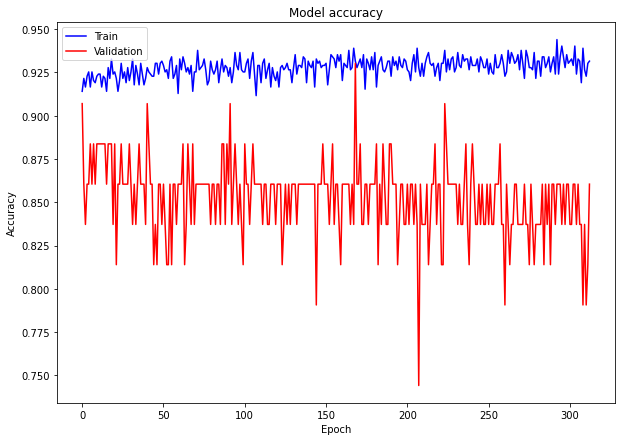

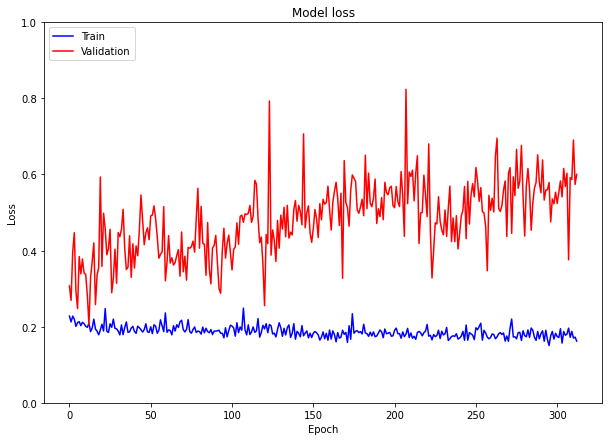

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history.history['val_loss'], color = 'red')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Parameters

The parameters in this neural network were here were:

Activation layers

First layer of tanh with 512 nodes, having 512*8 weights and 512 biases

Second layer of sigmoid with 256 nodes, having 512*256 weights and 256 biases

Third layer of tanh with 64 nodes, having 256*64 weights and 64 biases

Fourth layer of relu with 32 nodes, having 64*32 weights and 32 biases

Fifth layer of tanh with 16 nodes, having 32*16 weights and 16 biases

Output layer of sigmoid with 1 node, having 16*1 weights and 1 biase.



## Dataset : fetch_covtype

In [ ]:
from sklearn.datasets import fetch_covtype
forest = fetch_covtype()

### Preprocessing


In [ ]:
x_fetch_covtype = forest.data
y_fetch_covtype = forest.target
X = pd.DataFrame(x_fetch_covtype)
Y = pd.DataFrame(y_fetch_covtype)
print(X.shape)
print(Y.shape)

(581012, 54)
(581012, 1)


In [ ]:
X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
dtype: int64

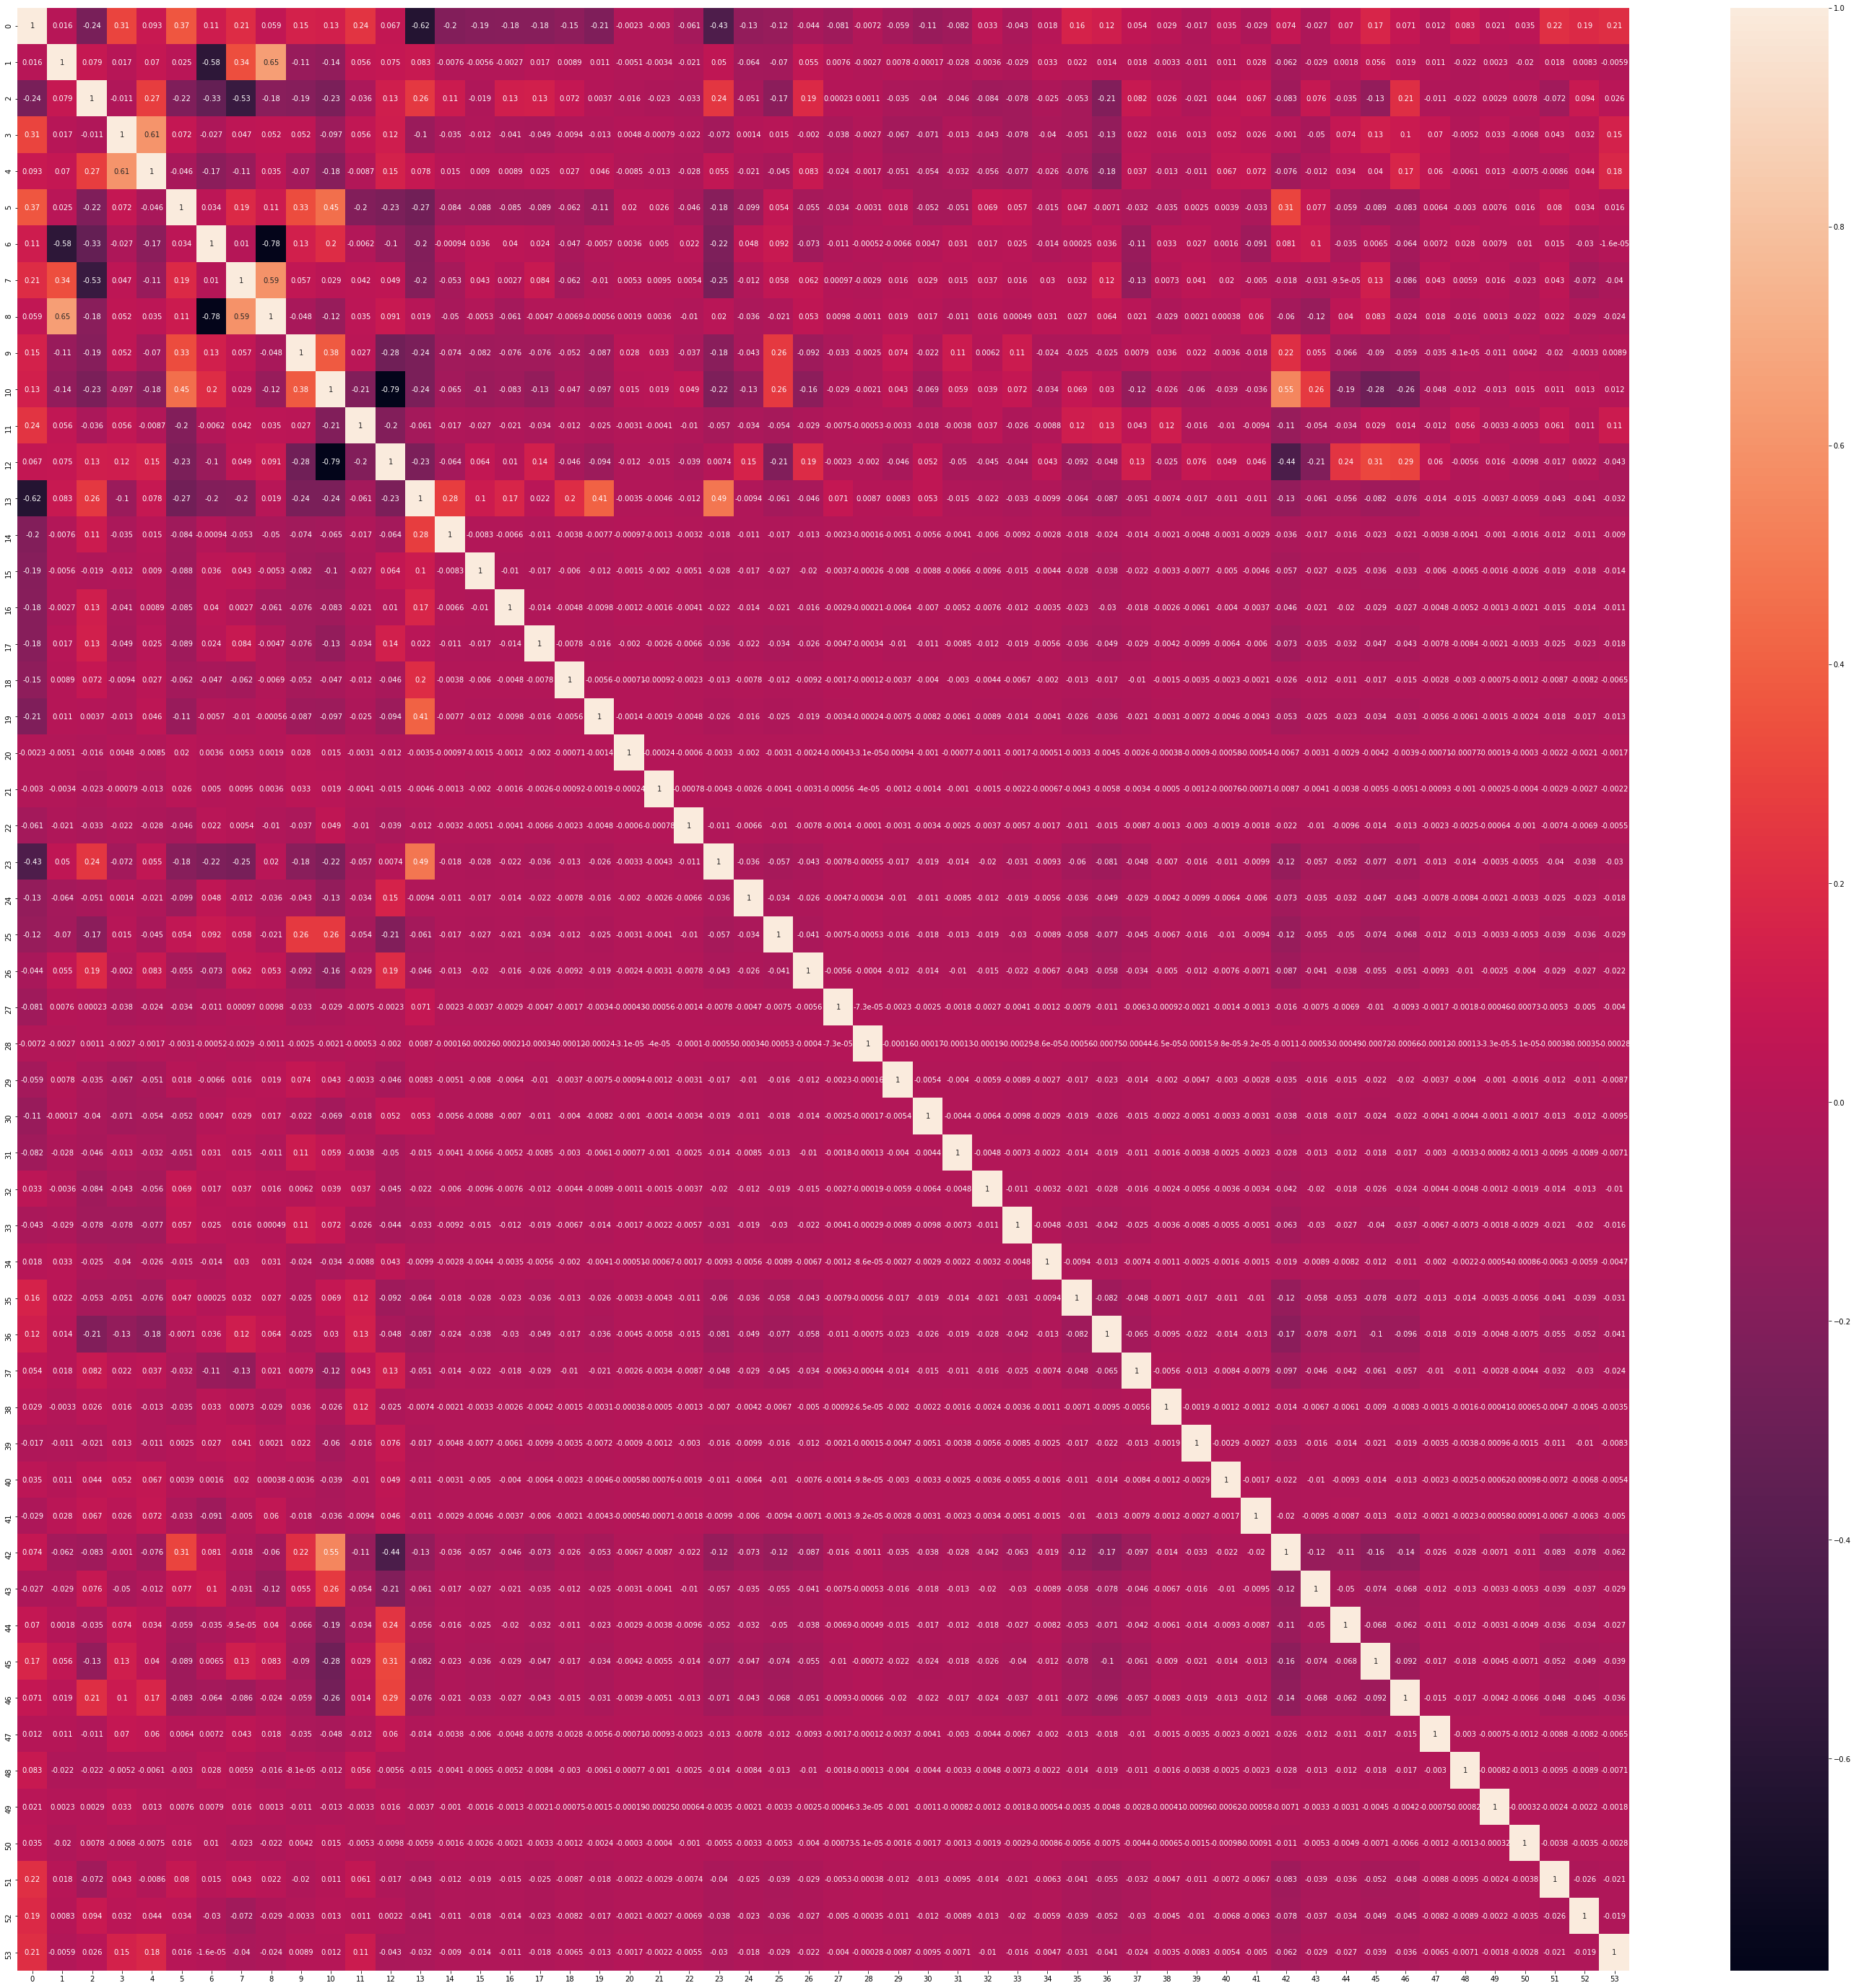

In [ ]:
cormat = X.corr()
fig, ax = plt.subplots(figsize = [50,50])
sns.heatmap(data = cormat, annot=True)
plt.show()

### Building NN model

In [ ]:
Y = Y.replace([1,2,3,4,5,6,7], [0,1,2,3,4,5,6])
Y = to_categorical(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05)
print("x_train_shape"+str(x_train.shape))
print("y_train_shape"+str(y_train.shape))
print("x_test_shape"+str(x_test.shape))
print("y_test_shape"+str(y_test.shape))

x_train_shape(551961, 54)
y_train_shape(551961, 7)
x_test_shape(29051, 54)
y_test_shape(29051, 7)


In [ ]:
nn = models.Sequential()
nn.add(layers.Dense(512, activation="relu",input_shape=(54, )))
nn.add(layers.Dense(256, activation="relu"))
nn.add(layers.Dense(64, activation="relu"))
nn.add(layers.Dense(32, activation="relu"))
nn.add(layers.Dense(16, activation="relu"))
nn.add(layers.Dense(7, activation="softmax"))

nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               28160     
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_26 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_27 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_28 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_29 (Dense)             (None, 7)                 119       
Total params: 178,663
Trainable params: 178,663
Non-trainable params: 0
________________________________________________

In [ ]:
nn.compile(optimizer="rmsprop",
           loss='categorical_crossentropy',
           metrics = ['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history = nn.fit(x_train,y_train, epochs=5000, batch_size = 5000, validation_split=0.05, verbose=0, callbacks=[es, mc])


Epoch 00001: val_accuracy improved from -inf to 0.49100, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.49100 to 0.49248, saving model to best_model.h5

Epoch 00003: val_accuracy did not improve from 0.49248

Epoch 00004: val_accuracy did not improve from 0.49248

Epoch 00005: val_accuracy did not improve from 0.49248

Epoch 00006: val_accuracy improved from 0.49248 to 0.51549, saving model to best_model.h5

Epoch 00007: val_accuracy improved from 0.51549 to 0.56049, saving model to best_model.h5

Epoch 00008: val_accuracy did not improve from 0.56049

Epoch 00009: val_accuracy improved from 0.56049 to 0.62883, saving model to best_model.h5

Epoch 00010: val_accuracy improved from 0.62883 to 0.65952, saving model to best_model.h5

Epoch 00011: val_accuracy did not improve from 0.65952

Epoch 00012: val_accuracy did not improve from 0.65952

Epoch 00013: val_accuracy improved from 0.65952 to 0.66589, saving model to best_model.h5

Epoch 00014: val_accuracy did

In [ ]:
saved_model = load_model('best_model.h5')

In [ ]:
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Test: %.3f' % ( test_acc))

Test: 0.958


### Plots

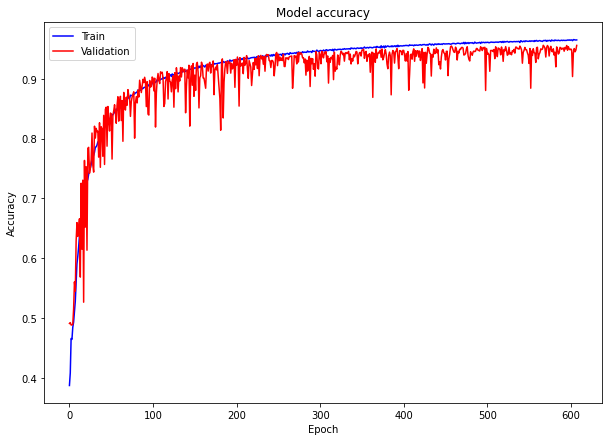

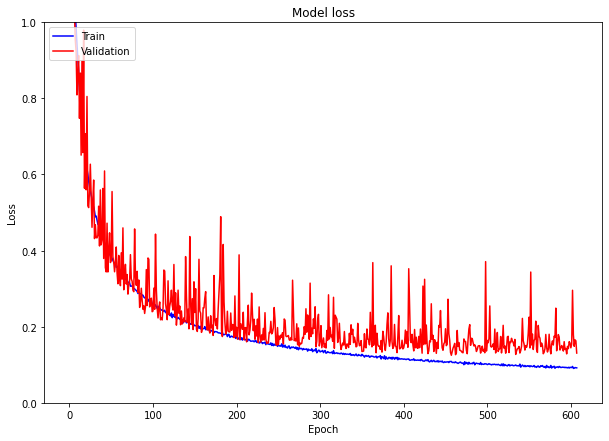

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history.history['val_loss'], color = 'red')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Dataset : fetch_kddcup99()

In [ ]:
from sklearn.datasets import fetch_kddcup99
kddcup99 = fetch_kddcup99()

###  Preprocessing

In [ ]:
x_fetch_kddcup99 = kddcup99.data
y_fetch_kddcup99 = kddcup99.target
X = pd.DataFrame(x_fetch_kddcup99)
Y = pd.DataFrame(y_fetch_kddcup99)
print(X.shape)
print(Y.shape)

(494021, 41)
(494021, 1)


In [ ]:
X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
dtype: int64

In [ ]:
le = LabelEncoder()
for i in [1,2,3]:
  X[i] = [j.decode('utf-8') for j in X[i]]
  X[i] = le.fit_transform(X[i])

for i in range(X.shape[1]):
  X[i] = X[i].astype('float')

In [ ]:
Y = [i.decode('utf-8') for i in y_fetch_kddcup99]
Y = pd.DataFrame(le.fit_transform(Y))

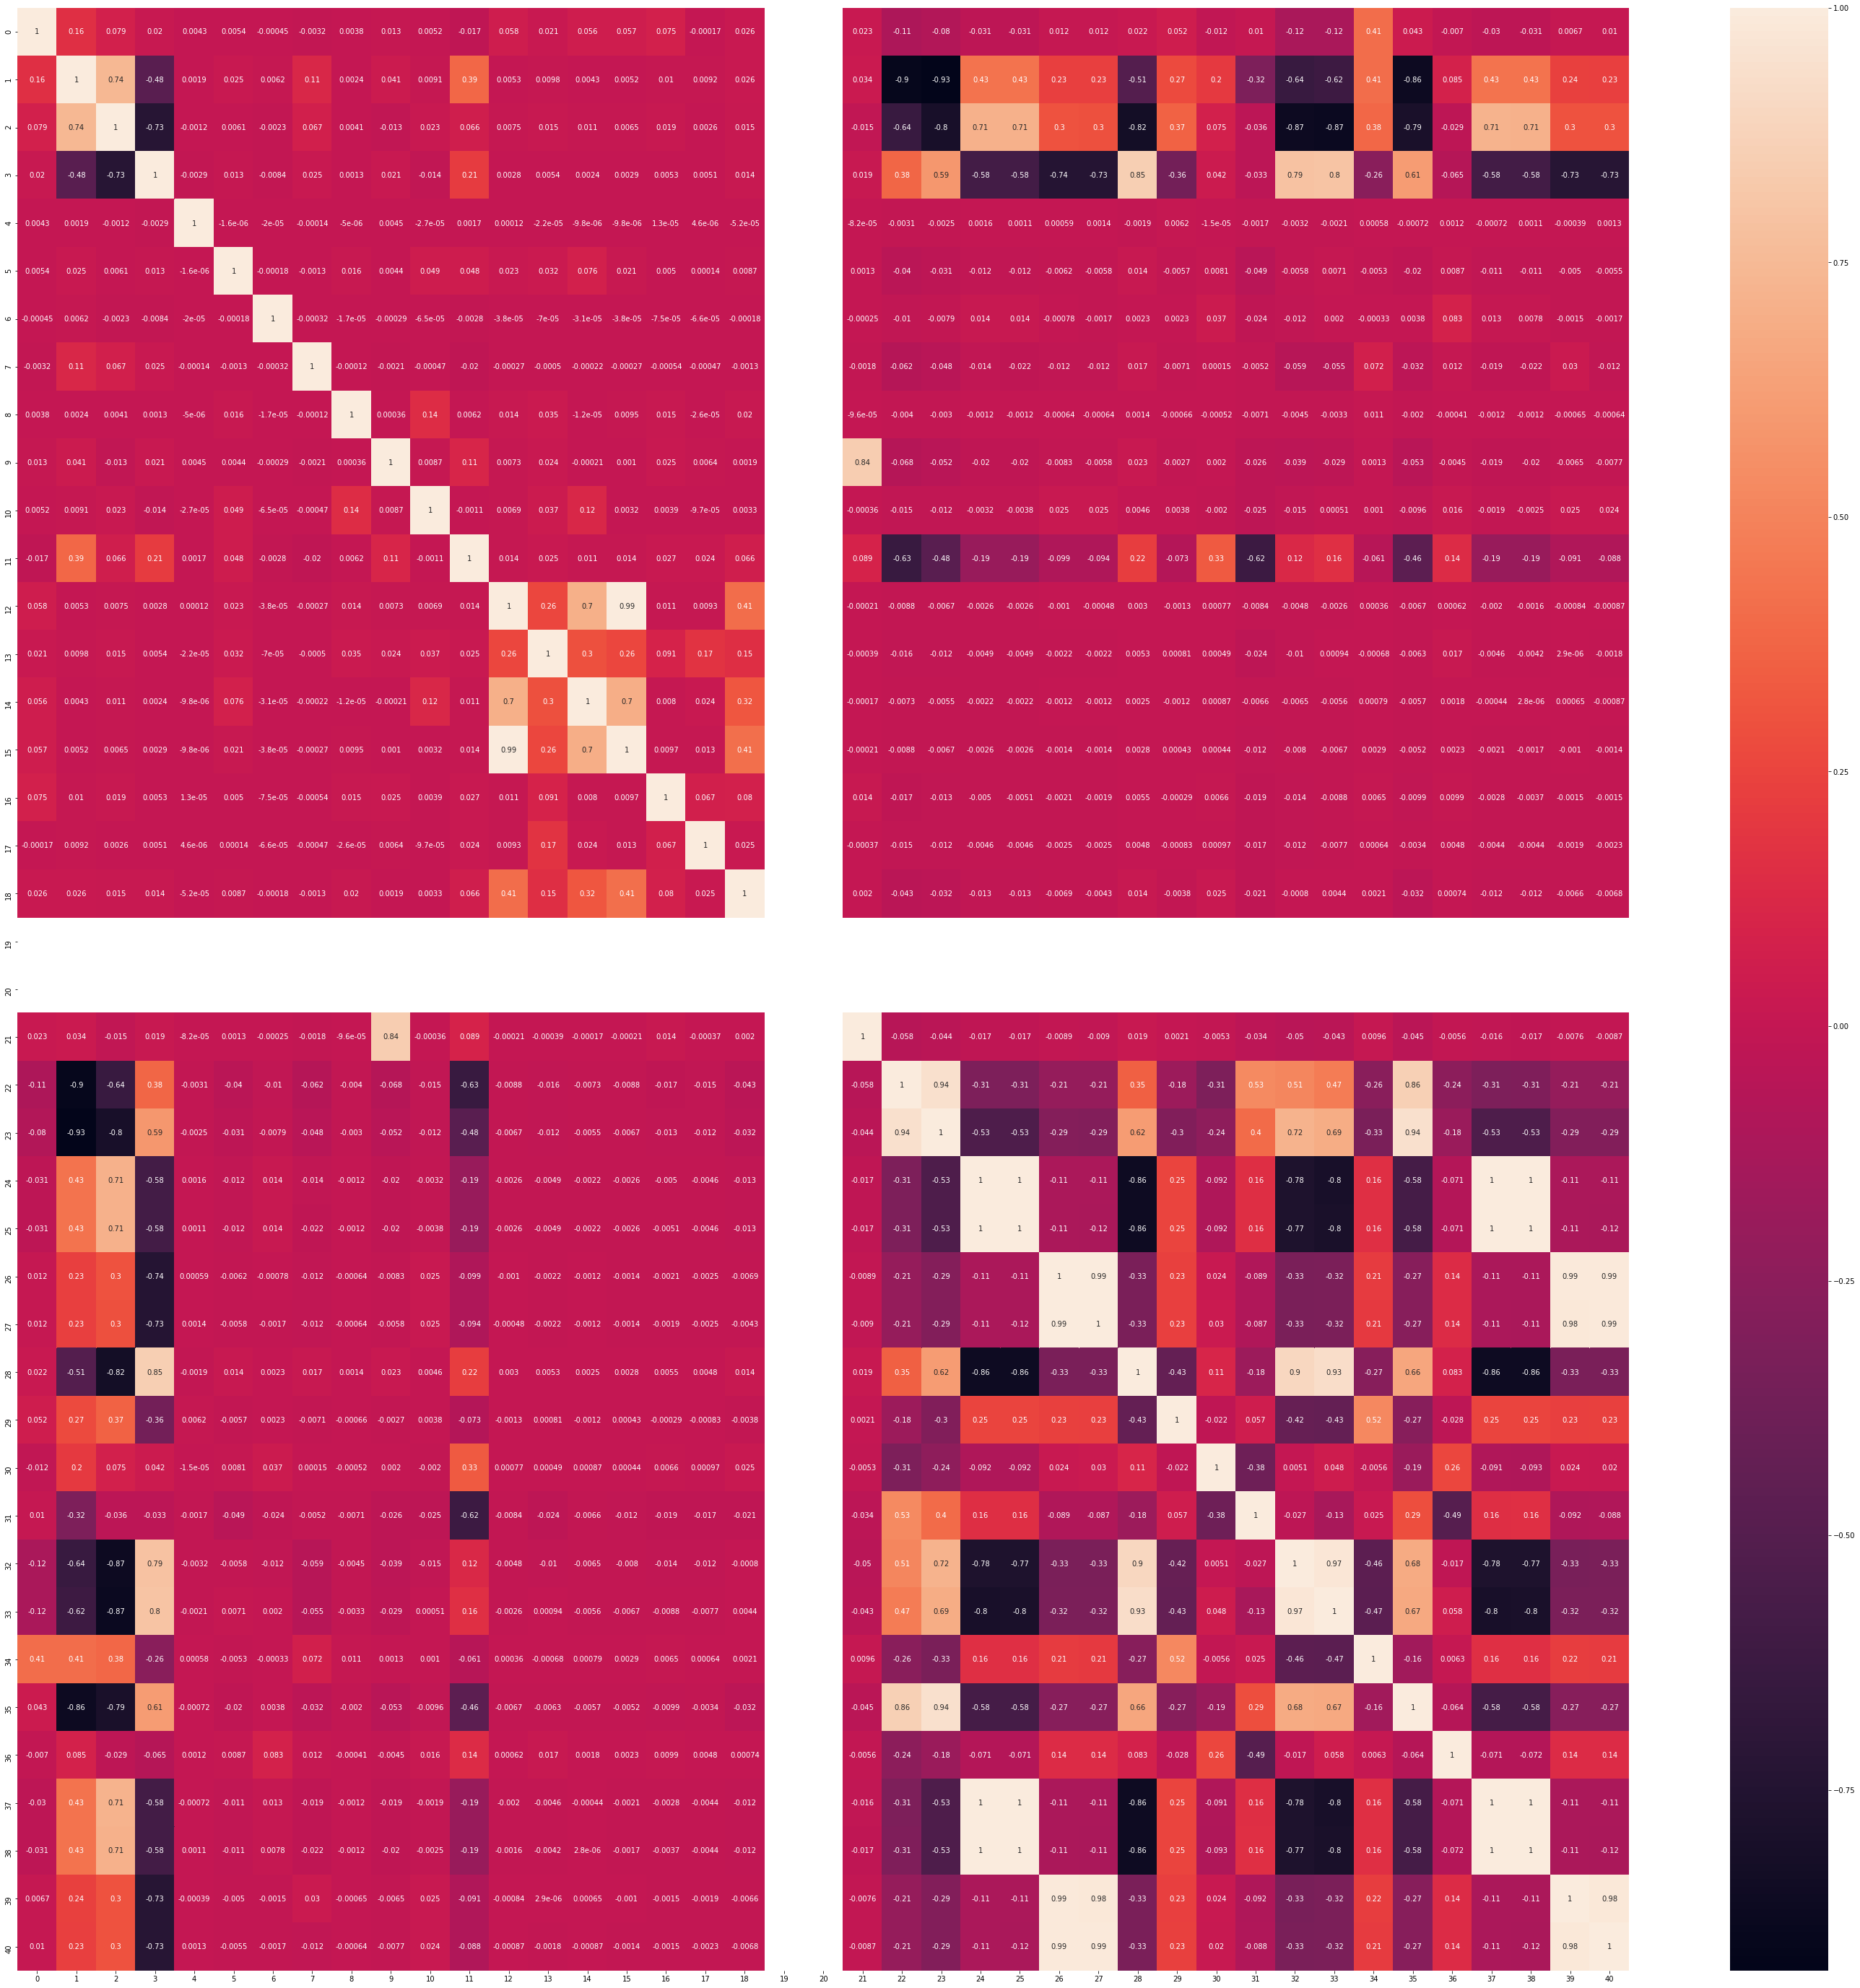

In [ ]:
cormat = X.corr()
fig, ax = plt.subplots(figsize = [50,50])
sns.heatmap(data = cormat, annot=True)
plt.show()

### Building NN model

In [ ]:
Y = to_categorical(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05)
print("x_train_shape"+str(x_train.shape))
print("y_train_shape"+str(y_train.shape))
print("x_test_shape"+str(x_test.shape))
print("y_test_shape"+str(y_test.shape))

x_train_shape(469319, 41)
y_train_shape(469319, 23)
x_test_shape(24702, 41)
y_test_shape(24702, 23)


In [ ]:
nn = models.Sequential()
nn.add(layers.Dense(512, activation="relu",input_shape=(41, )))
nn.add(layers.Dense(256, activation="relu"))
nn.add(layers.Dense(64, activation="relu"))
nn.add(layers.Dense(32, activation="relu"))
nn.add(layers.Dense(16, activation="relu"))
nn.add(layers.Dense(23, activation="softmax"))

nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               21504     
_________________________________________________________________
dense_31 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_32 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_35 (Dense)             (None, 23)                391       
Total params: 172,279
Trainable params: 172,279
Non-trainable params: 0
________________________________________________

In [ ]:
nn.compile(optimizer="rmsprop",
           loss='categorical_crossentropy',
           metrics = ['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history = nn.fit(x_train,y_train, epochs=5000, batch_size = 5000, validation_split=0.05, verbose=0, callbacks=[es, mc])


Epoch 00001: val_accuracy improved from -inf to 0.97622, saving model to best_model.h5

Epoch 00002: val_accuracy did not improve from 0.97622

Epoch 00003: val_accuracy improved from 0.97622 to 0.98679, saving model to best_model.h5

Epoch 00004: val_accuracy improved from 0.98679 to 0.99037, saving model to best_model.h5

Epoch 00005: val_accuracy did not improve from 0.99037

Epoch 00006: val_accuracy did not improve from 0.99037

Epoch 00007: val_accuracy improved from 0.99037 to 0.99101, saving model to best_model.h5

Epoch 00008: val_accuracy did not improve from 0.99101

Epoch 00009: val_accuracy did not improve from 0.99101

Epoch 00010: val_accuracy improved from 0.99101 to 0.99135, saving model to best_model.h5

Epoch 00011: val_accuracy improved from 0.99135 to 0.99156, saving model to best_model.h5

Epoch 00012: val_accuracy improved from 0.99156 to 0.99178, saving model to best_model.h5

Epoch 00013: val_accuracy did not improve from 0.99178

Epoch 00014: val_accuracy did

In [ ]:
saved_model = load_model('best_model.h5')

In [ ]:
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Test: %.3f' % ( test_acc))

Test: 0.992


### Plots

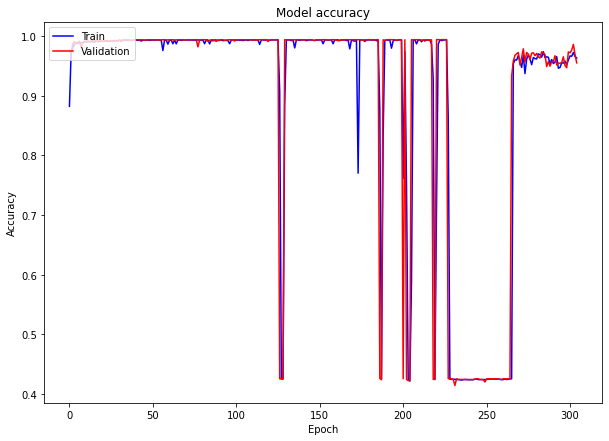

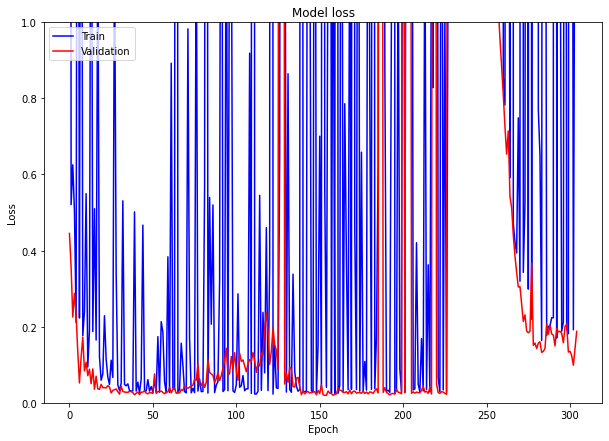

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history.history['val_loss'], color = 'red')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Dataset : load_breast_cancer()

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

### Preprocessing

In [ ]:
X = cancer.data
Y = cancer.target
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
print(X.shape)
print(Y.shape)

(569, 30)
(569, 1)


In [ ]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))

In [ ]:
X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

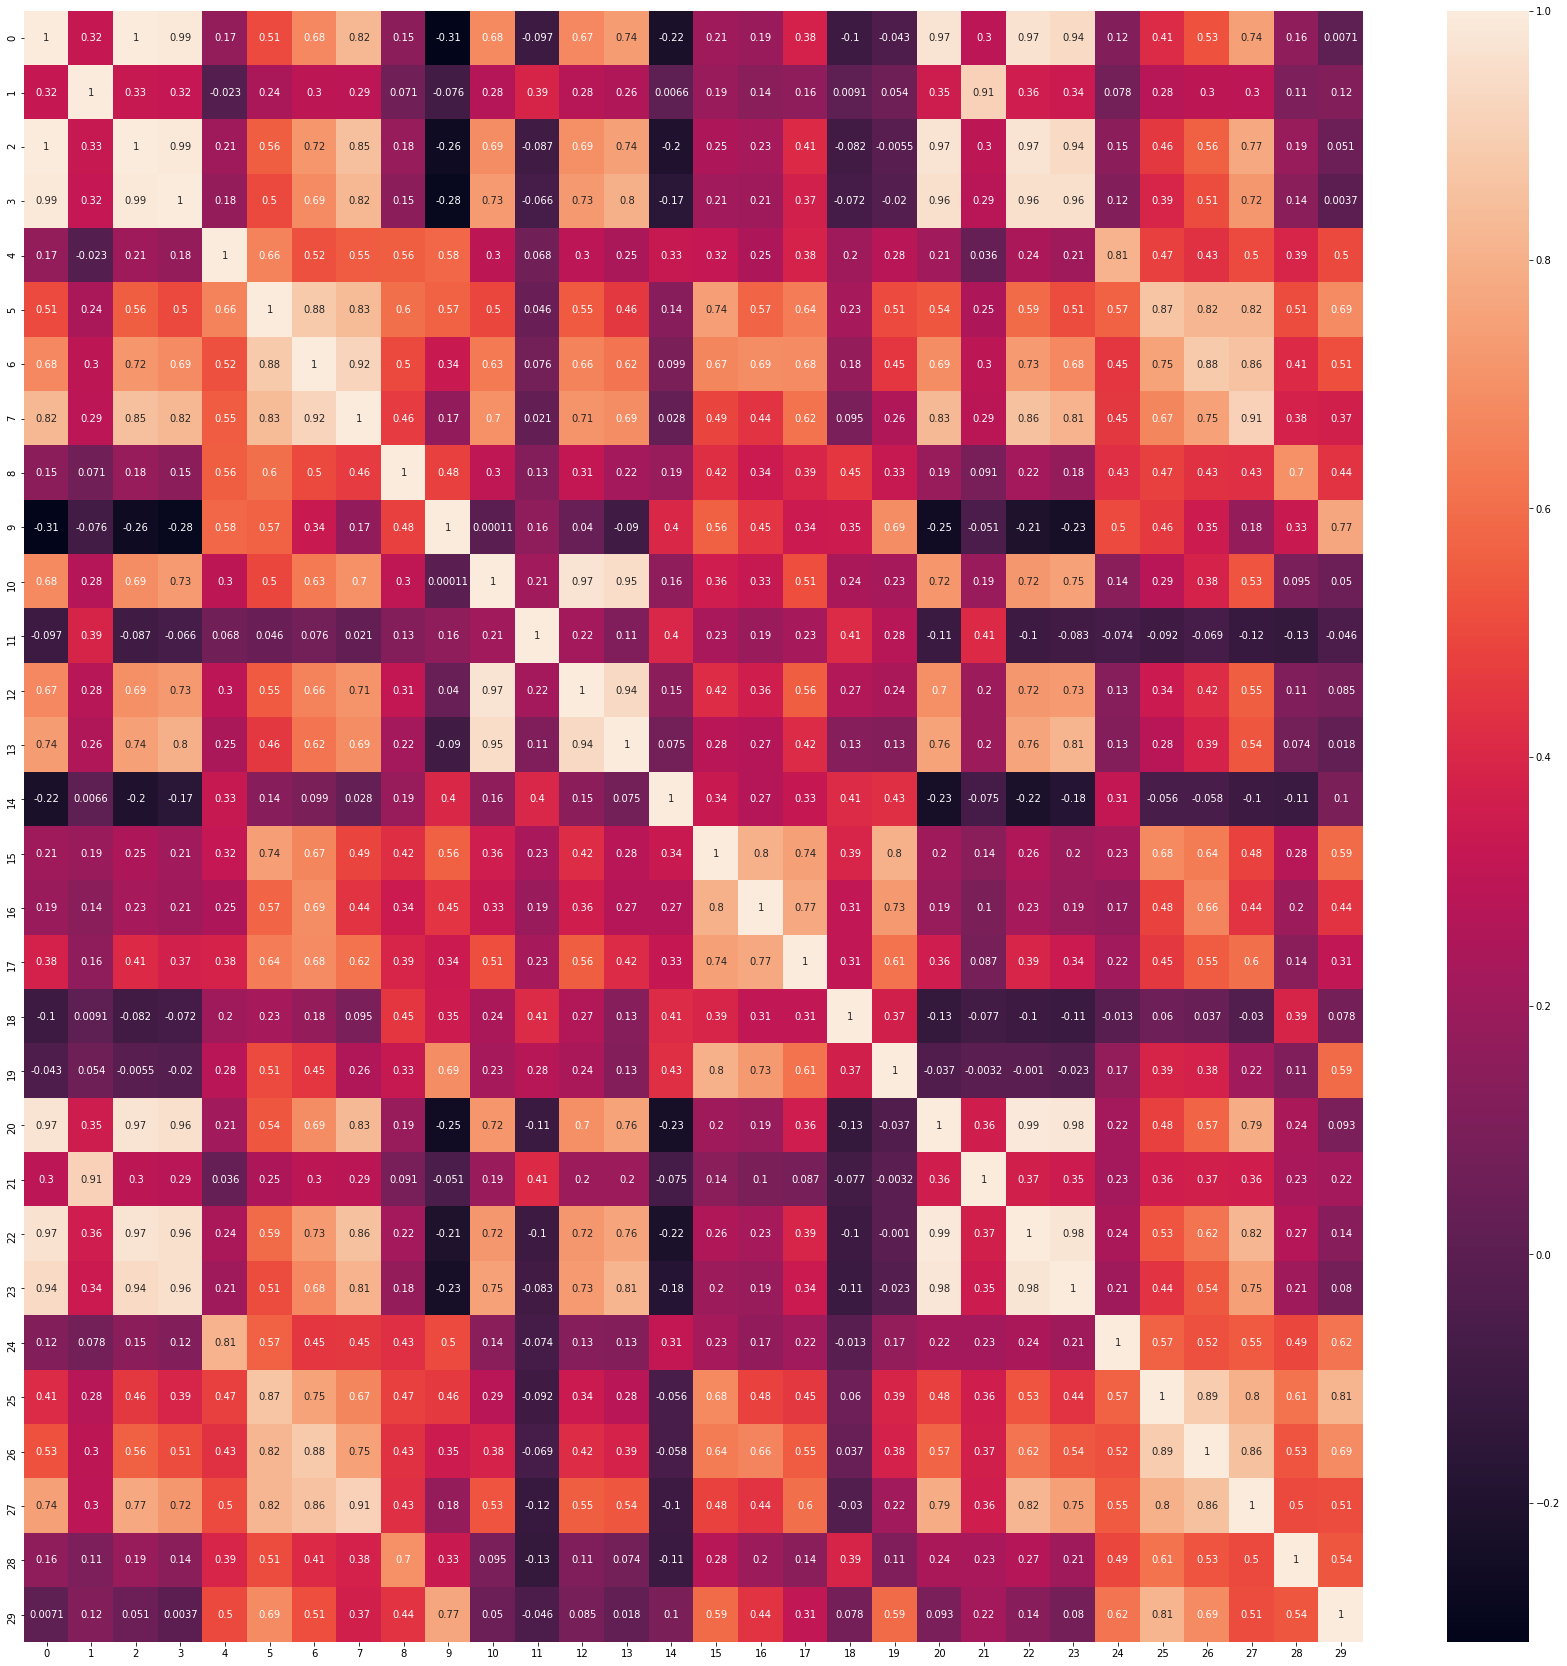

In [ ]:
cormat = X.corr()
fig, ax = plt.subplots(figsize = [30,30])
sns.heatmap(data = cormat, annot=True)
plt.show()

### Building NN model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05)
print("x_train_shape"+str(x_train.shape))
print("y_train_shape"+str(y_train.shape))
print("x_test_shape"+str(x_test.shape))
print("y_test_shape"+str(y_test.shape))

x_train_shape(540, 30)
y_train_shape(540, 1)
x_test_shape(29, 30)
y_test_shape(29, 1)


In [ ]:
nn = models.Sequential()
nn.add(layers.Dense(512, activation="tanh",input_shape=(30, )))
nn.add(layers.Dense(256, activation="sigmoid"))
nn.add(layers.Dense(64, activation="tanh"))
nn.add(layers.Dense(32, activation="relu"))
nn.add(layers.Dense(16, activation="tanh"))
nn.add(layers.Dense(1, activation="sigmoid"))

nn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 512)               15872     
_________________________________________________________________
dense_43 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_44 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_45 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_46 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 17        
Total params: 166,273
Trainable params: 166,273
Non-trainable params: 0
________________________________________________

In [ ]:
nn.compile(optimizer="rmsprop",
           loss='binary_crossentropy',
           metrics = ['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=300)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history = nn.fit(x_train,y_train, epochs=5000, batch_size = 5000, validation_split=0.05, verbose=0, callbacks=[es, mc])


Epoch 00001: val_accuracy improved from -inf to 0.62963, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.62963 to 0.92593, saving model to best_model.h5

Epoch 00003: val_accuracy did not improve from 0.92593

Epoch 00004: val_accuracy did not improve from 0.92593

Epoch 00005: val_accuracy did not improve from 0.92593

Epoch 00006: val_accuracy did not improve from 0.92593

Epoch 00007: val_accuracy did not improve from 0.92593

Epoch 00008: val_accuracy improved from 0.92593 to 1.00000, saving model to best_model.h5

Epoch 00009: val_accuracy did not improve from 1.00000

Epoch 00010: val_accuracy did not improve from 1.00000

Epoch 00011: val_accuracy did not improve from 1.00000

Epoch 00012: val_accuracy did not improve from 1.00000

Epoch 00013: val_accuracy did not improve from 1.00000

Epoch 00014: val_accuracy did not improve from 1.00000

Epoch 00015: val_accuracy did not improve from 1.00000

Epoch 00016: val_accuracy did not improve from 1.00000

E

In [ ]:
saved_model = load_model('best_model.h5')
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Test: %.3f' % ( test_acc))

Test: 1.000


### Plots

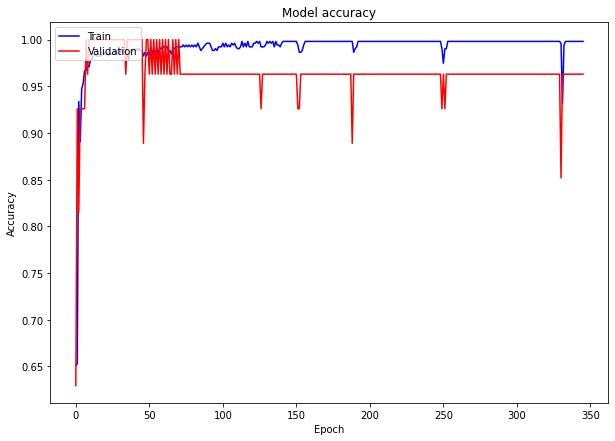

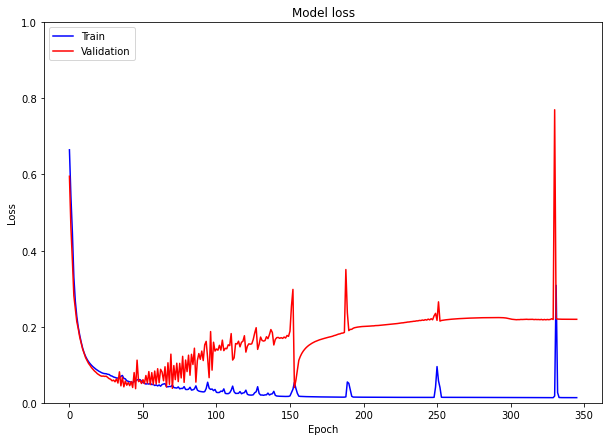

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history.history['val_loss'], color = 'red')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Dataset : load_wine()

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()

### Preprocessing

In [ ]:
X = wine.data
Y = wine.target
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
print(X.shape)
print(Y.shape)

(178, 13)
(178, 1)


In [ ]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))

In [ ]:
X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

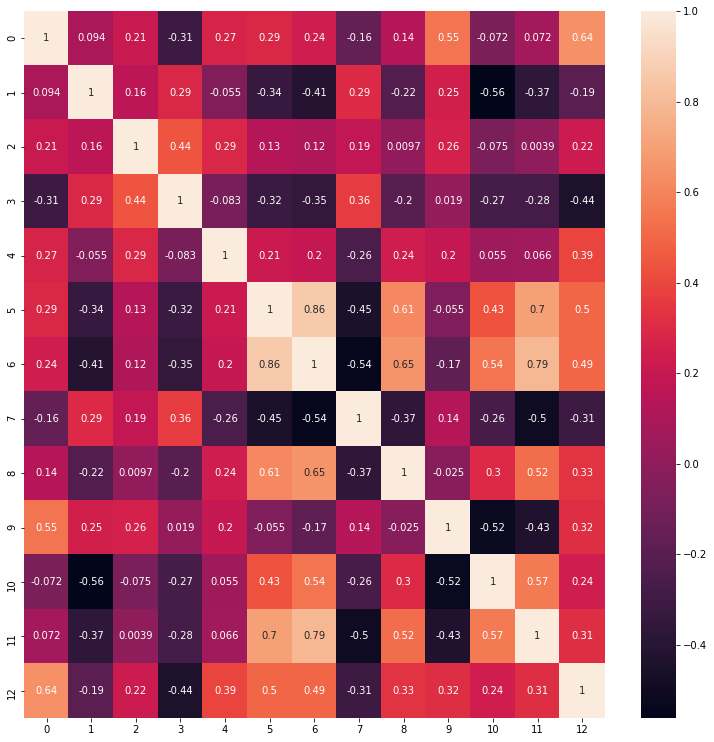

In [ ]:
cormat = X.corr()
fig, ax = plt.subplots(figsize = [13,13])
sns.heatmap(data = cormat, annot=True)
plt.show()

### Building NN Model

In [ ]:
Y = to_categorical(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05)
print("x_train_shape"+str(x_train.shape))
print("y_train_shape"+str(y_train.shape))
print("x_test_shape"+str(x_test.shape))
print("y_test_shape"+str(y_test.shape))

x_train_shape(169, 13)
y_train_shape(169, 3)
x_test_shape(9, 13)
y_test_shape(9, 3)


In [ ]:
nn = models.Sequential()
nn.add(layers.Dense(128, activation="relu",input_shape=(13, )))
nn.add(layers.Dense(64, activation="relu"))
nn.add(layers.Dense(32, activation="relu"))
nn.add(layers.Dense(16, activation="relu"))
nn.add(layers.Dense(3, activation="softmax"))

nn.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_69 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_70 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_71 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_72 (Dense)             (None, 3)                 51        
Total params: 12,707
Trainable params: 12,707
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn.compile(optimizer="rmsprop",
           loss='categorical_crossentropy',
           metrics = ['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=300)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history = nn.fit(x_train,y_train, epochs=5000, batch_size = 1000, validation_split=0.05, verbose=0, callbacks=[es, mc])


Epoch 00001: val_accuracy did not improve from 1.00000

Epoch 00002: val_accuracy did not improve from 1.00000

Epoch 00003: val_accuracy did not improve from 1.00000

Epoch 00004: val_accuracy did not improve from 1.00000

Epoch 00005: val_accuracy did not improve from 1.00000

Epoch 00006: val_accuracy did not improve from 1.00000

Epoch 00007: val_accuracy did not improve from 1.00000

Epoch 00008: val_accuracy did not improve from 1.00000

Epoch 00009: val_accuracy did not improve from 1.00000

Epoch 00010: val_accuracy did not improve from 1.00000

Epoch 00011: val_accuracy did not improve from 1.00000

Epoch 00012: val_accuracy did not improve from 1.00000

Epoch 00013: val_accuracy did not improve from 1.00000

Epoch 00014: val_accuracy did not improve from 1.00000

Epoch 00015: val_accuracy did not improve from 1.00000

Epoch 00016: val_accuracy did not improve from 1.00000

Epoch 00017: val_accuracy did not improve from 1.00000

Epoch 00018: val_accuracy did not improve from 

In [ ]:
saved_model = load_model('best_model.h5')
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Test: %.3f' % ( test_acc))

Test: 0.889


### Plots

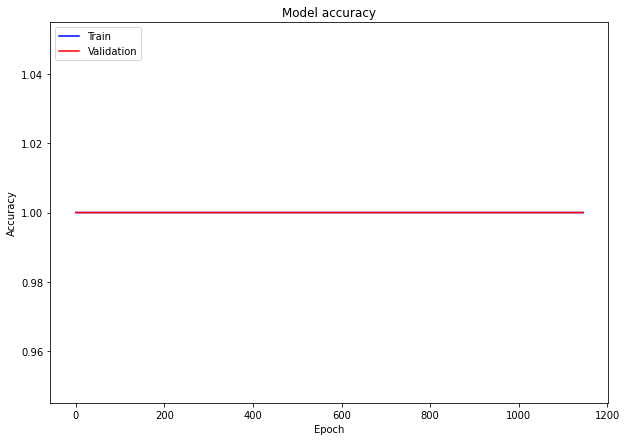

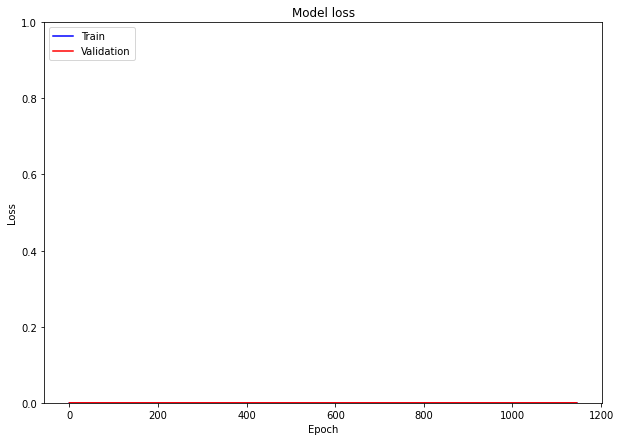

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history.history['val_loss'], color = 'red')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()